In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
file_path = "C:/Users/manos/OneDrive/Desktop/GitHub/Portfolio1/Project_2_Netherlands_Banking_Risk/cleaned_banks_stock_data.csv"
bank_data = pd.read_csv(file_path, parse_dates=["Date"], index_col="Date")

# Compute daily log returns
returns = np.log(bank_data.pct_change() + 1).dropna()

# Display first rows
print("First 5 rows of log returns:")
print(returns.head())

# Save computed returns
returns.to_csv("C:/Users/manos/OneDrive/Desktop/GitHub/Portfolio1/Project_2_Netherlands_Banking_Risk/banks_returns.csv")


First 5 rows of log returns:
            NN Group  ING Group  ABN AMRO  KBC Group  Deutsche Bank
Date                                                               
2015-11-23  0.014070  -0.010504 -0.005733  -0.011499       0.012365
2015-11-24  0.010157  -0.018809 -0.003456   0.011315      -0.000768
2015-11-25  0.033990   0.013412 -0.001154  -0.002586       0.025948
2015-11-26 -0.001029   0.008705  0.002692   0.018504      -0.025794
2015-11-27  0.011259  -0.009746  0.011834   0.025272       0.008418


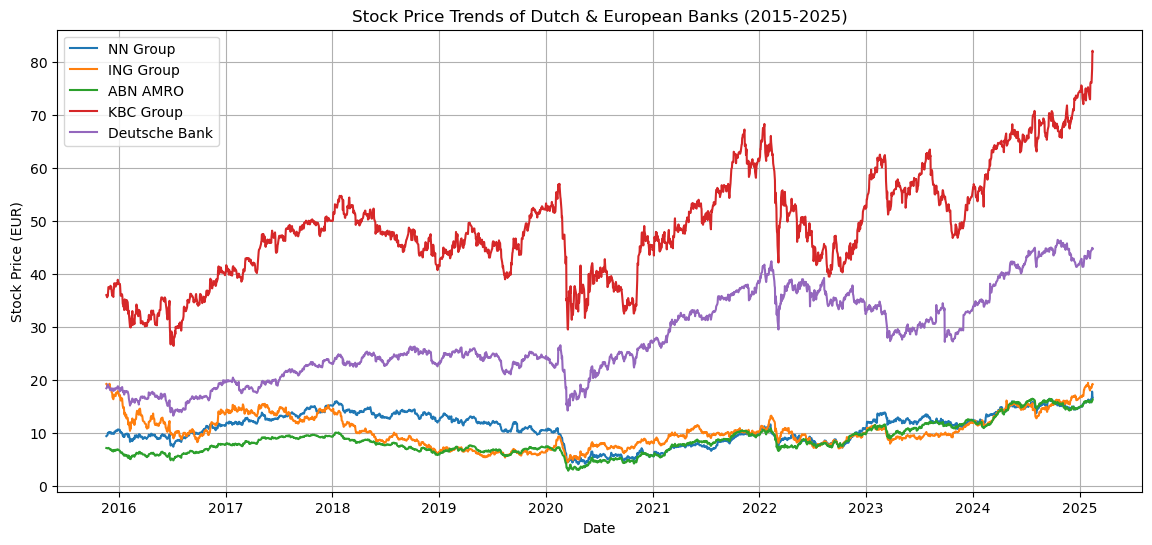

In [2]:
# Plot the stock prices
plt.figure(figsize=(14, 6))
for bank in bank_data.columns:
    plt.plot(bank_data.index, bank_data[bank], label=bank)

plt.title("Stock Price Trends of Dutch & European Banks (2015-2025)")
plt.xlabel("Date")
plt.ylabel("Stock Price (EUR)")
plt.legend()
plt.grid()
plt.show()

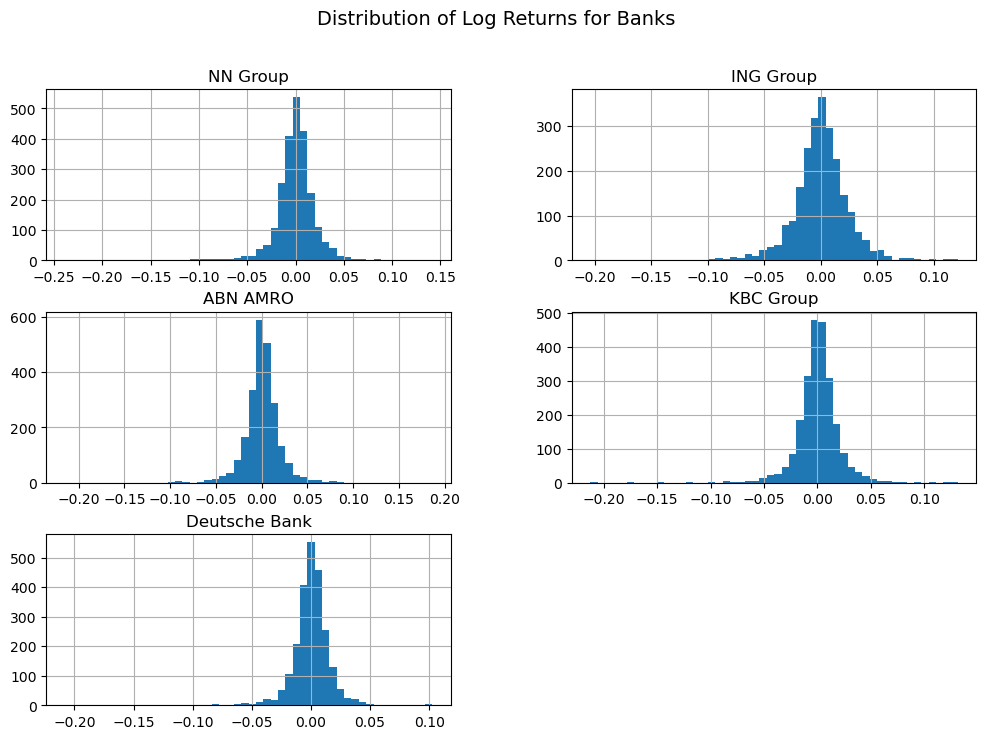

In [3]:
# Plot histograms of stock returns
returns.hist(bins=50, figsize=(12, 8))
plt.suptitle("Distribution of Log Returns for Banks", fontsize=14)
plt.show()


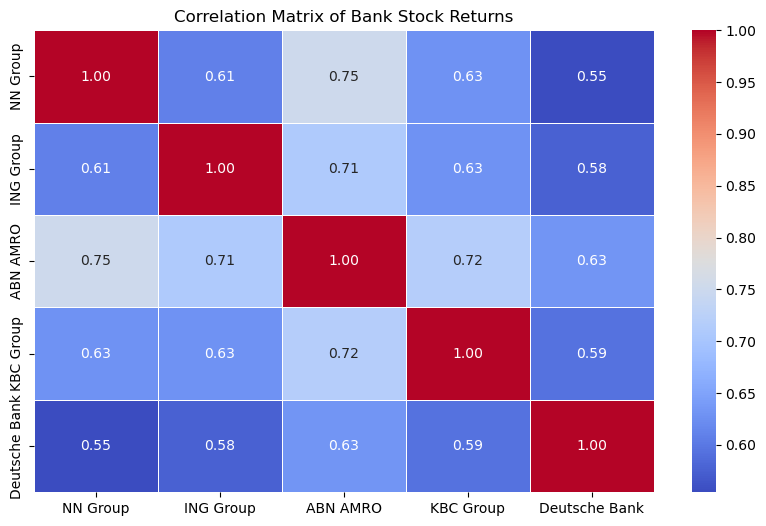

In [4]:
# Compute correlation matrix
correlation_matrix = returns.corr()

# Visualize correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Bank Stock Returns")
plt.show()


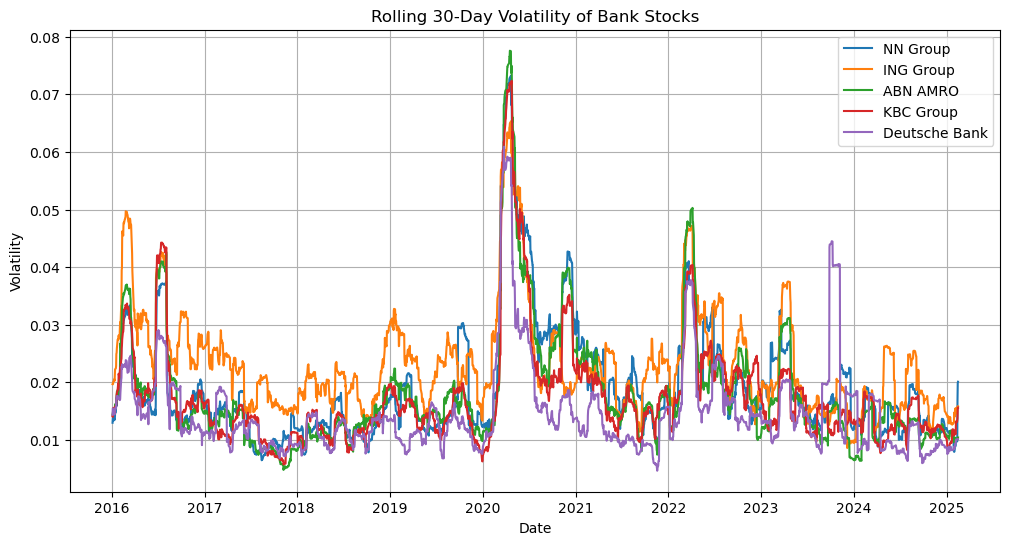

In [5]:
# Compute 30-day rolling volatility
rolling_volatility = returns.rolling(window=30).std()

# Plot rolling volatility
plt.figure(figsize=(12, 6))
for bank in rolling_volatility.columns:
    plt.plot(rolling_volatility.index, rolling_volatility[bank], label=bank)

plt.title("Rolling 30-Day Volatility of Bank Stocks")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.grid()
plt.show()

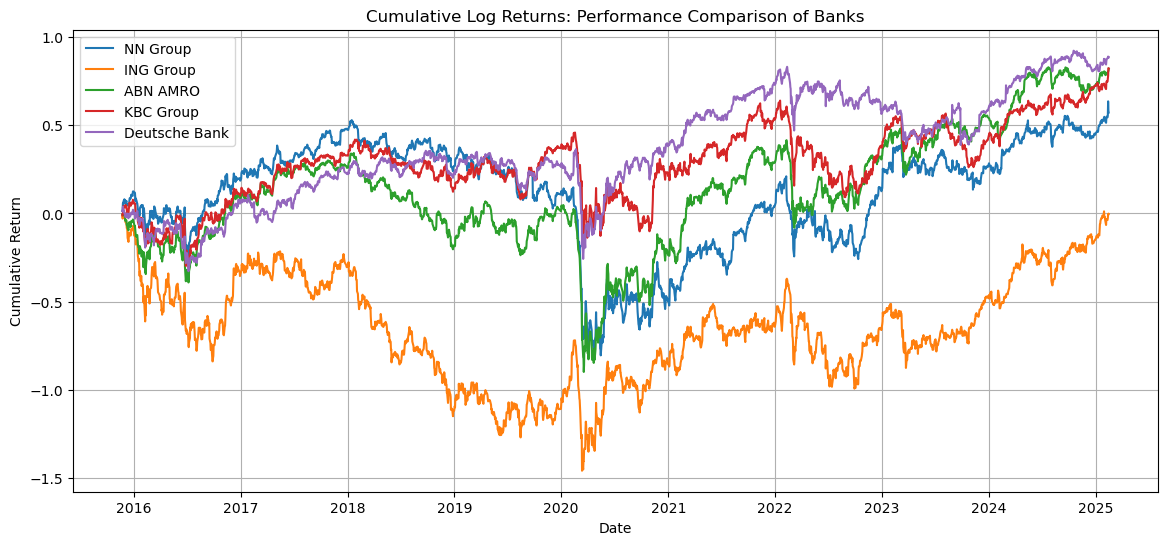

In [10]:
# Compute cumulative log returns
cumulative_returns = returns.cumsum()

# Plot cumulative returns for all banks
plt.figure(figsize=(14, 6))
for bank in cumulative_returns.columns:
    plt.plot(cumulative_returns.index, cumulative_returns[bank], label=bank)

plt.title("Cumulative Log Returns: Performance Comparison of Banks")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid()
plt.show()
